In [3]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 
from keras.preprocessing import image  
import warnings 
warnings.filterwarnings('ignore') 
import pyttsx3
 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg

root_dir = './raw-img'

In [16]:
import os
import cv2
import numpy as np

# Define the root directory containing subdirectories for different categories
# root_dir = 'your_root_directory_path'

# Define the image size
image_size = (128, 128)

# Initialize lists to store images and labels
X = []
Y = []

# Loop through the subdirectories (categories) within the root directory
for category in os.listdir(root_dir):
    category_dir = os.path.join(root_dir, category)
    
    # Loop through all the image files in each category
    for filename in os.listdir(category_dir):
        if filename.endswith('.jpeg') or filename.endswith('.png') or filename.endswith('.jpg'):
            image_path = os.path.join(category_dir, filename)
            
            # Use the folder name (category) as the label
            label = category

            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
            X.append(image)
            Y.append(label)

# Convert the lists to NumPy arrays
X = np.array(X, dtype=np.float32) / 255.0  # Perform element-wise division
Y = np.array(Y)


In [18]:
import sys
size_bytes = sys.getsizeof(X)
# Convert to megabytes
size_mb = size_bytes / (1024 ** 2)

print(f"The size of X is approximately {size_mb:.2f} megabytes.")

The size of X is approximately 2462.25 megabytes.


In [19]:
# for getting the folder name 
folder = []
for category in os.listdir(root_dir):
    category_dir = os.path.join(root_dir, category)
    folder.append(category)

In [20]:
folder

['butterfly', 'cat', 'cow', 'dog', 'horse']

In [21]:

# Sample one-dimensional array of integers
int_array = Y

# Define a mapping from strings to integers 
str_to_int_mapping = {
    'butterfly':0,
    'cat':1,
    'cow':2,
    'dog':3,
    'horse':4    
}

# Replace strings with integers using the mapping
int_array = [str_to_int_mapping[i] for i in int_array]

# covert list to array 

Y_label = np.array(int_array)

# X_data = np.array(X/255,dtype=np.uint8)

In [22]:
Y_label

array([0, 0, 0, ..., 4, 4, 4])

In [23]:
Y_label.shape

(13132,)

In [24]:
y = Y_label.reshape(-1,1)
y.shape

(13132, 1)

In [25]:
import tensorflow as tf
from tensorflow.keras import layers

# Adjust input_shape based on your actual input data shape
input_shape = (128,128, 3)

model = tf.keras.models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(2, 2),

    # Dense layers
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(5, activation='softmax')  # Adjust to the number of classes
])

# Compile the model with the appropriate loss and metrics
model.compile(loss='sparse_categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 32)                4064288   
                                                                 
 dense_1 (Dense)             (None, 5)                 165       
                                                                 
Total params: 4065349 (15.51 MB)
Trainable params: 4065349 (15.51 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [26]:
X.shape


(13132, 128, 128, 3)

In [60]:
model.fit(X,y, epochs=5, validation_split=0.2)


Epoch 1/5
329/329 [==============================] - 110s 332ms/step - loss: 0.0674 - accuracy: 0.9858 - val_loss: 23.3831 - val_accuracy: 0.0011
Epoch 2/5
329/329 [==============================] - 107s 326ms/step - loss: 0.0360 - accuracy: 0.9946 - val_loss: 25.4318 - val_accuracy: 0.0011
Epoch 3/5
329/329 [==============================] - 103s 312ms/step - loss: 0.0417 - accuracy: 0.9906 - val_loss: 24.6931 - val_accuracy: 0.0011
Epoch 4/5
329/329 [==============================] - 105s 319ms/step - loss: 0.0309 - accuracy: 0.9941 - val_loss: 27.5439 - val_accuracy: 0.0011
Epoch 5/5
329/329 [==============================] - 98s 298ms/step - loss: 0.0253 - accuracy: 0.9942 - val_loss: 27.4014 - val_accuracy: 0.0011


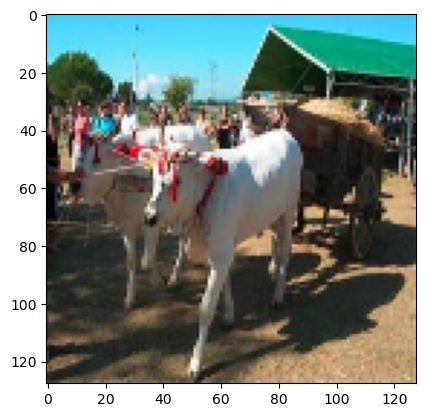

In [113]:
pic = X[4023]
plt.imshow(pic)


In [114]:
prediction = model.predict((pic*255).reshape(1,128,128,3))
print(prediction)


1/1 [==============================] - 0s 39ms/step
[[0. 0. 1. 0. 0.]]


In [115]:
import pyttsx3

classi = ['butterfly', 'cat', 'cow', 'dog', 'horse']

# Assuming prediction is a 1D array containing class probabilities
# If it's a 2D array, you may need to adjust the logic accordingly
max_prob_index = prediction.argmax()

obj = classi[max_prob_index]

text_to_speak = f"This is a {obj} image."

# speak the prediction object
engine = pyttsx3.init()
engine.setProperty('rate', 130)
voices = engine.getProperty('voices')
engine.setProperty('voice', voices[0].id)

engine.say(text_to_speak)
print(text_to_speak)
engine.runAndWait()


This is a cow image.
